# Метод деления отрезка пополам и метод покоординатного спуска

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Одномерная оптимизация. Метод деления отрезка пополам

**Задача 17.47.** Методом деления отрезка пополам найти точку минимума $x^*$ функции $f(x) = \frac{2x}{\ln2} - 2x^2$ на отрезке $x \in [-3,5; 4,5]$ с точностью $\varepsilon = 0,02$.

In [2]:
def f(x):
    return (2 * x) / np.log(2) - 2 * x ** 2

### Метод деления отрезка пополам

Основная идея метода деления отрезка пополам, также известного как **метод дихотомии**, заключается в разбиении заданного интервала пополам и выборе той половины, в которой функция имеет более подходящие значения.

На каждой итерации будем получать отрезок, содержащий точку минимума (локализующий отрезок), так, что длина каждого следующего отрезка меньше длины предыдущего. 

**Основные шаги метода деления отрезка пополам:**
1. Вначале примем $a_1 = a, b_1 = b$ и выберем некоторое положительное число $\delta > 0$
2. Вычислим $c_1 = \frac{a_1 + b_1}{2} - \frac{\delta}{2}, d_1 = \frac{a_1 + b_1}{2} + \frac{\delta}{2}$
3. Если $f(c_1) \leq f(d_1)$, то $a_2 = a_1$ , $b_2 = d_1$. Если же $f(c_1) > f(d_1)$, то $a_2 = c_1$, $b_2 = b_1$.
4. Шаги 2-3 повторяются до тех пор, пока не выполнится $\varepsilon_i = \frac{b_i−a_i}{2} \leq \varepsilon$, где $\varepsilon$ - требуемая погрешность определения точки минимума

In [3]:
def dichotomy_method(a, b, f, eps, delta, max_iterations=100):
    
    a1 = a
    b1 = b
    
    count = 0
    x_points, y_points = [], []  # Сюда будем добавлять точки для визуализации
    
    while (b1 - a1) / 2 > eps:
        
        count += 1
        if count == max_iterations:
            print(f'\nПри delta = {delta} и epsilon = {eps} метод дихотомии не сходится')
            return None, None, None, None
            
        x_points.append((a1 + b1) / 2)
        y_points.append(f((a1 + b1) / 2))
        
        c1 = (a1 + b1) / 2 - delta / 2
        d1 = (a1 + b1) / 2 + delta / 2

        if f(c1) <= f(d1):
            b1 = d1

        elif f(c1) > f(d1): 
            a1 = c1

    return (a1 + b1) / 2, count, x_points, y_points

In [4]:
a = -3.5
b = 4.5
eps = 0.02
delta = 0.001

x_min, k, x_points, y_points = dichotomy_method(a, b, f, eps, delta)
print('x* =', x_min)
print('f* =', f(x_min))
print('k =', k)

x* = -3.483876953125
f* = -34.32714125571264
k = 8


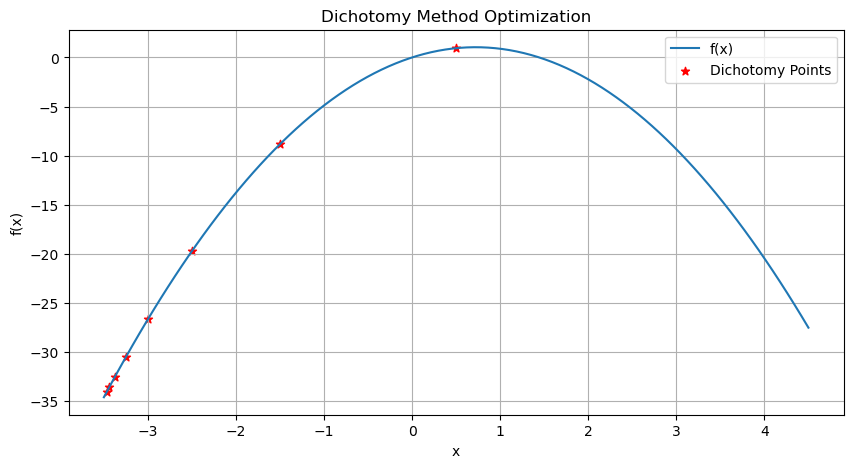

In [5]:
plt.figure(figsize=(10, 5))
x = np.linspace(a, b, 100)
y = [f(xi) for xi in x]
plt.plot(x, y, label='f(x)')

plt.scatter(x_points, y_points, color='red', marker='*', label='Dichotomy Points')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Dichotomy Method Optimization')
plt.grid(True)
plt.show()

**Что будет происходить при уменьшении $\varepsilon$ и $\delta$?**

In [6]:
a = -3.5
b = 4.5
eps = 0.02
delta = 0.001

for i in range(4):
    x_min, k, x_points, y_points = dichotomy_method(a, b, f, eps/(10 ** i), delta)
    
    if x_min is not None:
        print('\nepsilon =', eps/(10 ** i))
        print('x* =', x_min)
        print('f* =', f(x_min))
        print('k =', k)
    else:
        break


epsilon = 0.02
x* = -3.483876953125
f* = -34.32714125571264
k = 8

epsilon = 0.002
x* = -3.4985235595703124
f* = -34.573939373387645
k = 12

При delta = 0.001 и epsilon = 0.0002 метод дихотомии не сходится


In [7]:
a = -3.5
b = 4.5
eps = 0.02
delta = 0.0001

for i in range(4):
    x_min, k, x_points, y_points = dichotomy_method(a, b, f, eps/(10 ** i), delta)
    
    if x_min is not None:
        print('\nepsilon =', eps/(10 ** i))
        print('x* =', x_min)
        print('f* =', f(x_min))
        print('k =', k)
    else:
        break


epsilon = 0.02
x* = -3.4843251953125
f* = -34.33468149362261
k = 8

epsilon = 0.002
x* = -3.4989734497070315
f* = -34.58153369169842
k = 12

epsilon = 0.0002
x* = -3.499827931213379
f* = -34.595959896855085
k = 15

При delta = 0.0001 и epsilon = 2e-05 метод дихотомии не сходится


In [8]:
a = -3.5
b = 4.5
eps = 0.02
delta = 0.00001

for i in range(4):
    x_min, k, x_points, y_points = dichotomy_method(a, b, f, eps/(10 ** i), delta)
    
    if x_min is not None:
        print('\nepsilon =', eps/(10 ** i))
        print('x* =', x_min)
        print('f* =', f(x_min))
        print('k =', k)
    else:
        break


epsilon = 0.02
x* = -3.48437001953125
f* = -34.335435561616244
k = 8

epsilon = 0.002
x* = -3.4980418774414064
f* = -34.565809291480875
k = 11

epsilon = 0.0002
x* = -3.4998729298400884
f* = -34.59671968929853
k = 15

epsilon = 2e-05
x* = -3.4999873706150058
f* = -34.59865203444963
k = 19


## 2. Многомерная оптимизация (безусловная). Метод покоординатного спуска 

**Задача 1а.** Методом покоординатного спуска минимизировать функцию (одномерную задачу решать методом ломаных или методом касательных):

A: $f(x_1, x_2) = (x_1 + 1)^2 + 2(x_2 - 1)^2$

B: $f(x_1, x_2) = (x_1 - x_2^2)^2 + x_2^4$

C: $f(x_1, x_2) = 9x_1^2 + x_1x_2 + x_2^2$

In [9]:
def fA(x):
    x1, x2 = x
    return (x1 + 1) ** 2 + 2 * (x2 - 1) ** 2

def fB(x):
    x1, x2 = x
    return (x1 - x2 ** 2) ** 2 + x2 ** 4

def fC(x):
    x1, x2 = x
    return 9 * x1 ** 2 + x1 * x2 + x2 ** 2

### Нарисуем графики этих функций:

In [10]:
def Draw_Function(fig, index, projection, X, Y, func, title):
    ax = fig.add_subplot(index, projection=projection)
    ax.plot_surface(X, Y, func, cmap='viridis') if projection == '3d' else ax.contourf(X, Y, func, cmap='viridis')
    ax.set_xlabel('x1', fontsize=12, labelpad=10)
    ax.set_ylabel('x2', fontsize=12, labelpad=10)
    ax.set_title(title, fontsize=20)

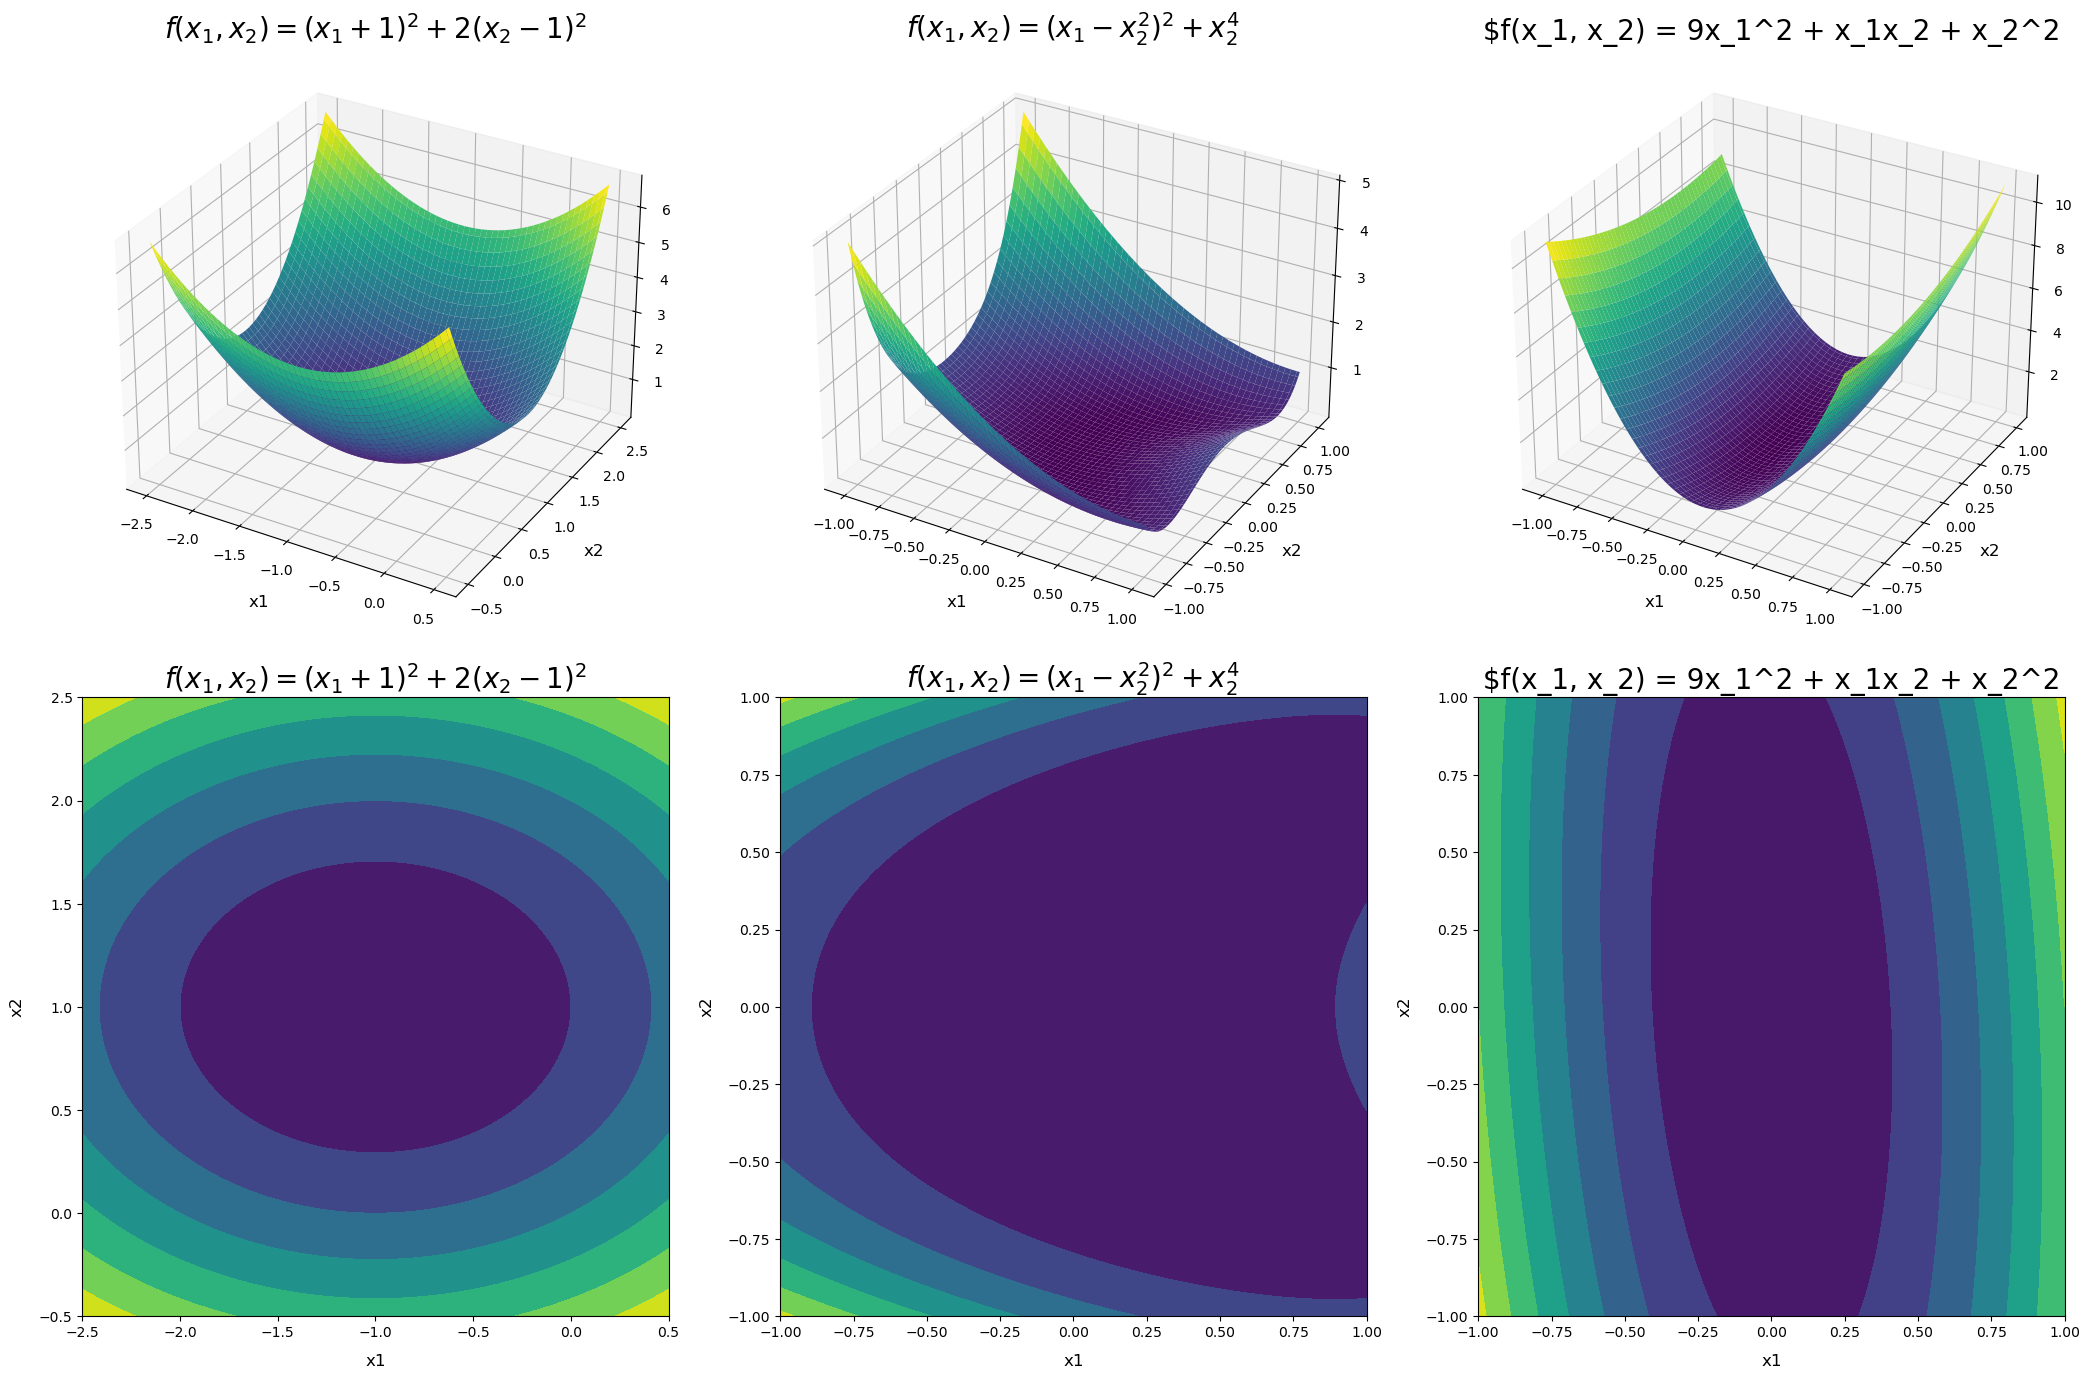

In [11]:
fig = plt.figure(figsize=(21, 14))

X_ranges = [(-2.5, 0.5), (-1, 1), (-1, 1)]
Y_ranges = [(-0.5, 2.5), (-1, 1), (-1, 1)]
functions = [fA, fB, fC]
titles = ["$f(x_1, x_2) = (x_1 + 1)^2 + 2(x_2 - 1)^2$",
          "$f(x_1, x_2) = (x_1 - x_2^2)^2 + x_2^4$",
          "$f(x_1, x_2) = 9x_1^2 + x_1x_2 + x_2^2"]

for i in range(3):
    X = np.linspace(X_ranges[i][0], X_ranges[i][1], 100)
    Y = np.linspace(Y_ranges[i][0], Y_ranges[i][1], 100)
    xx, yy = np.meshgrid(X, Y)
    z = functions[i]([xx, yy])
    Draw_Function(fig, 231 + i, '3d', xx, yy, z, titles[i])
    Draw_Function(fig, 234 + i, None, xx, yy, z, titles[i])

plt.tight_layout()

### Одномерную задачу минимизации решим методом ломаных

### Идея метода

Пусть функция $f(x)$, заданная на $\left [ a,b\right ]$, удовлетворяет условию Липшица:

$\mid f(x_2)-f(x_1) \mid \le L\|x_2 - x_1 \|$.

Из условий Липшица очевидным образом вытекает двухстороннее неравенство, которое ограничивает ожидаемое поведение функции.

$f_i-L \| x-x_i \| \le f(x) \le f_i + L \|x - x_i\|$, где $f_i$, точка, в которой произведено измерение.

Пусть проведено несколько испытаний $x_1, x_2, ..., x_k \rightarrow f_1, f_2, ..., f_k$.

Функцию $f_k^- (x)= \max^{}_{i=\overline {1,k}} \left \{ f_i - L\|x - x_i\| \right \}$ назовем **минорантой**, а $f_k^+ (x)= \min^{}_{i=\overline {1,k}} \left \{ f_i + L\|x - x_i\| \right \}$ - **мажорантой**.

Графически представляют собой ломаные, поэтому этот метод называют методом ломаных.
Очевидно, что они ограничивают функцию с двух сторон: $f_k^- (x) \le f(x) \le f_k^+ (x)$

Обозначим $f_k^* = \min^{}_{i=\overline {1,k}} \left \{ f_i \right \}$. Глобальный минимум функции $f(x^*)$ может быть оценен:
$\min^{}_{x \in \left [ a,b \right ] } \left \{ f_k^- (x) \right \} \le f(x^*) \le f_k^*$

Сделав указанный "коридор" меньше наперед заданного $\varepsilon$, можно отыскать глобальный минимум функции. Метод ломаных на каждом шаге производит новое испытание функции $f_{i+1}$, корректируя при этом миноранту и текущую оценку глобального минимума. Испытания проводятся в точке минимума текущей миноранты.

Протыми словами, идея метода ломаных заключается в аппроксимации целевой функции f кусочно-линейной функцией, звенья которой имеют угловые коэффициенты ±L. В качестве минимального значения функции f принимается минимальное значение функции, графиком которой является эта ломанная.

### Алгоритм
1. Задаем (или оцениваем) константу Липшица $L > 0$, точность $\varepsilon > 0$, и $k_0$ - количество начальных испытаний.
2. Проводим эти испытания в любых различных точках на компакте $K$. $x_1, x_2, ..., x_k \rightarrow f_1, f_2, ..., f_k$. $k:=k_0$
3. $f_k^* = \min^{}_{i=\overline {1,k}} \left \{ f_i \right \}$. Можно просто сравнивать со значением на предыдущей итерации.
4. $x_{k+1} = arg \min^{}_{x \in \Pi_k} f_k^-(x)$, где $\Pi_k=\left \{ x \in K : f(x)\le f_k^* \right \}$.
5. Если $f_k^* - f_k^-(x_{k+1}) \le \varepsilon$ - остановка. Минимум найден в точке $x_{k+1}$.
6. Проводится испытание $f_{k+1} = f(x_{k+1})$. $k:=k+1$. Корректируется миноранта. Возврат на шаг 2.

**Ещё одно описание алгоритма:** на 26 странице в pdf файле https://alexey-abakumkin.github.io/lectures-sem-2/CM/CM2.pdf

In [12]:
def Minimize(f, a, b):
    
    L = 0
    x = np.linspace(a, b, 1000)
    y = [f(i) for i in x]
    
    # константа Липшица
    for i in range(len(x) - 1):
        
        x1 = x[i]
        x2 = x[i + 1]
        
        L_tmp = abs(f(x1) - f(x2)) / abs(x1 - x2)
        
        if L_tmp > L:
            L = L_tmp
            
    while True:      
        
        y_min = min(y) # минимум функции в точках иcпытаний
        x_min = x[0]
        min_val = y[0]
        min_index = 0
        
        for i in range(len(x) - 1):
            
            # значение х в точках пересечения соседних ветвей миноранты:
            x_mean = (y[i] - y[i+1] + L * (x[i] + x[i+1])) / (2 * L) 
            # значение у в точках пересечения соседних ветвей миноранты:
            y_mean = y[i] - L * (x_mean - x[i])
            
            # поиск точки минимума миноранты:
            if y_mean < min_val:                
                min_val = y_mean
                min_index = i
                x_min = x_mean
        
        # точка минимума миноранты:
        x_minorant = x_min

        # добавляем точку минимума миноранты и её значение к точкам испытаний:
        x = np.concatenate((x[:min_index + 1], [x_minorant], x[min_index + 1:]))
        # добавляем значение миноранты к точкам испытаний:
        y = np.concatenate((y[:min_index + 1], [f(x_minorant)], y[min_index + 1:]))
        
        # условие остановки:
        if np.abs(y_min - f(x_minorant)) <= 1e-3:
            return x_minorant

### В двумерном случае метод покоординатного спуска работает следующим образом:

Пусть $x^k = (x^k_1, x^k_2)^T$:

– Фиксируем значение $x^k_2$ и проводим минимизацию по переменной $x_1$. Получаем $(x^{k+1}_1, x^k_2)^T$
    
– Фиксируем значение $x^{k+1}_1$ и проводим минимизацию по переменной $x_2$. Получаем $(x^{k+1}_1, x^{k+1}_2)^T$

Итак, получаем $x^{k+1} = (x^{k+1}_1, x^{k+1}_2)^T$.

Процесс повторяется до тех пор, пока для некоторого заданного положительного $\varepsilon$ не выполнится условие остановки:

$|f(x^{k+1}) - f(x^k)| \leq \varepsilon$ или $||x^{k+1} - x^k|| \leq \varepsilon$, либо их комбинация.

In [13]:
def Coordinate_Descent(f, x0, delta, epsilon):
    
    x = np.array(x0)
    steps = []
    steps.append([x[0], x[1]])
    k = 0
    
    while True:
        
        k += 1
        
        x1 = x[0]
        x2 = Minimize(lambda x1: f([x1, x[1]]), x1 - delta, x1 + delta)
        x = np.array([x2, x[1]])
        
        x2 = x[1]
        x1 = Minimize(lambda x2: f([x[0], x2]), x2 - delta, x2 + delta)
        x = np.array([x[0], x1])
        
        if np.linalg.norm(x - x0) <= epsilon and abs(f(x) - f(x0)) <= epsilon:
            break
            
        x0 = x
        
        steps.append([x[0], x[1]])
        
    return x, steps, k

Найдём $x^*$ и $f^*$ для функции $f(x_1, x_2) = (x_1 + 1)^2 + 2(x_2 - 1)^2$

In [14]:
x0 = [1.0, -1.0]
delta = np.array([0.005, 0.05, 0.5, 1])
epsilon = 0.001

for i in range(len(delta)):
    x, stepsA, k = Coordinate_Descent(fA, x0, delta[i], epsilon)
    print('delta = ', delta[i])
    print('f* = ', round(fA(x), 4))
    print('x* = ', round(x[0], 4), round(x[1], 4))
    print('k = ', k, '\n')

delta =  0.005
f* =  0.0
x* =  -1.0 1.0
k =  401 

delta =  0.05
f* =  0.0
x* =  -1.0 1.0
k =  41 

delta =  0.5
f* =  0.0
x* =  -0.9997 1.0001
k =  6 

delta =  1.0
f* =  0.0
x* =  -1.0008 1.0008
k =  4 



Найдём $x^*$ и $f^*$ для функции $f(x_1, x_2) = (x_1 - x_2^2)^2 + x_2^4$

In [15]:
x0 = [1.0, -1.0]
delta = np.array([0.001, 0.005, 0.05, 0.1])
epsilon = 0.001

for i in range(len(delta)):
    x, stepsB, k = Coordinate_Descent(fB, x0, delta[i], epsilon)
    print('delta = ', delta[i])
    print('f* = ', round(fB(x), 4))
    print('x* = ', round(x[0], 4), round(x[1], 4))
    print('k = ', k, '\n')

delta =  0.001
f* =  0.0
x* =  0.0002 -0.0131
k =  1113 

delta =  0.005
f* =  0.0
x* =  0.0 -0.0029
k =  228 

delta =  0.05
f* =  0.0
x* =  0.0001 0.007
k =  31 

delta =  0.1
f* =  0.0
x* =  0.0001 0.0061
k =  20 



Найдём $x^*$ и $f^*$ для функции $f(x_1, x_2) = 9x_1^2 + x_1x_2 + x_2^2$

In [16]:
x0 = [1.0, -1.0]
delta = np.array([0.005, 0.05, 0.5, 1])
epsilon = 0.001

for i in range(len(delta)):
    x, stepsC, k = Coordinate_Descent(fC, x0, delta[i], epsilon)
    print('delta = ', delta[i])
    print('f* = ', round(fC(x), 4))
    print('x* = ', round(x[0], 4), round(x[1], 4))
    print('k = ', k, '\n')

delta =  0.005
f* =  0.0
x* =  0.0 -0.0
k =  201 

delta =  0.05
f* =  0.0
x* =  -0.0 0.0
k =  22 

delta =  0.5
f* =  0.0
x* =  -0.0004 0.0001
k =  5 

delta =  1.0
f* =  0.0
x* =  0.001 -0.001
k =  3 



### Траектория спуска

In [17]:
def Draw_Trajectory(ax, X, Y, f, title):
    xx, yy = np.meshgrid(X, Y)
    z = f([xx, yy])
    ax.contourf(xx, yy, z, cmap='viridis')
    ax.set_xlabel('x1', fontsize=12, labelpad=10)
    ax.set_ylabel('x2', fontsize=12, labelpad=10)
    ax.set_title(title, fontsize=20)

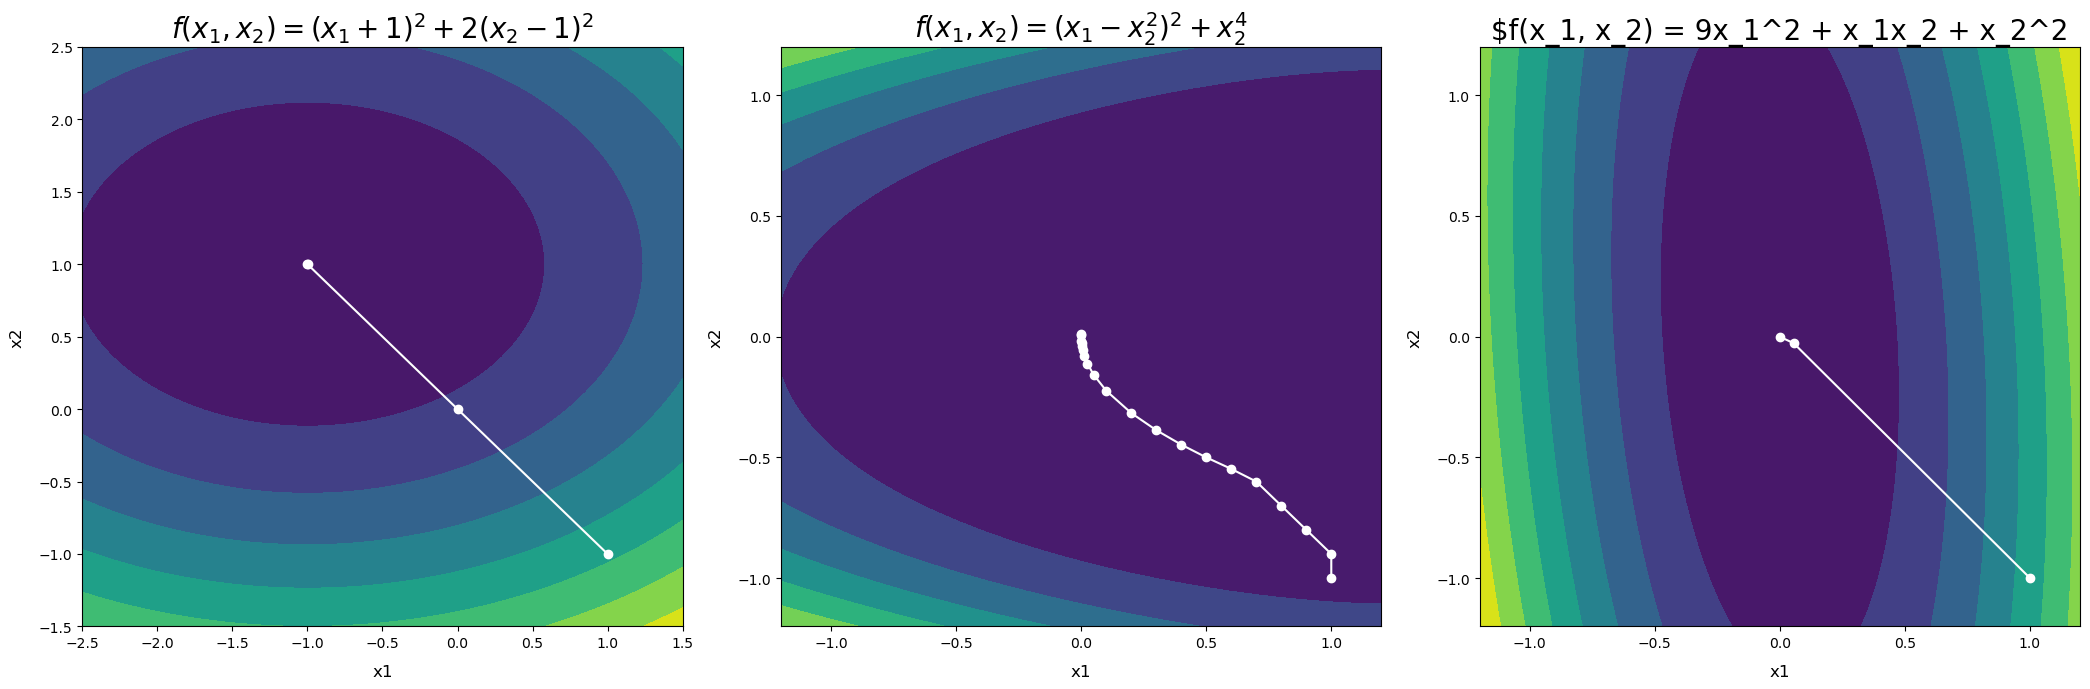

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

X_ranges = [(-2.5, 1.5), (-1.2, 1.2), (-1.2, 1.2)]
Y_ranges = [(-1.5, 2.5), (-1.2, 1.2), (-1.2, 1.2)]
titles = ["$f(x_1, x_2) = (x_1 + 1)^2 + 2(x_2 - 1)^2$",
          "$f(x_1, x_2) = (x_1 - x_2^2)^2 + x_2^4$",
          "$f(x_1, x_2) = 9x_1^2 + x_1x_2 + x_2^2"]

for i, ax in enumerate(axes):
    X = np.linspace(X_ranges[i][0], X_ranges[i][1], 100)
    Y = np.linspace(Y_ranges[i][0], Y_ranges[i][1], 100)
    Draw_Trajectory(ax, X, Y, functions[i], titles[i])

steps = [stepsA, stepsB, stepsC]
for i, ax in enumerate(axes):
    steps_matrix = np.matrix(steps[i])
    ax.plot(steps_matrix[:, 0], steps_matrix[:, 1], '-o', color='white')

plt.tight_layout()